## Predicting the Sale Price of Bulldozers using Machine Learning

### 1. Problem definition
> How well can we predict the future sale price of a bulldozer?
(given its characteristics/previous examples of how much similar bulldozers have been sold for)

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
In other words, our goal for this project is to build a machine learning model which minimises RMSLE.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. This data dictionary can be viewed on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('Kaggle\TrainAndValid.csv', low_memory=False)
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
cols = data.columns.tolist()

dick = {}
for j in range(len(cols)):
    dick[cols[j]] = len(data[cols[j]].unique())
    
print(dick)

{'SalesID': 412698, 'SalePrice': 954, 'MachineID': 348808, 'ModelID': 5281, 'datasource': 6, 'auctioneerID': 31, 'YearMade': 73, 'MachineHoursCurrentMeter': 15634, 'UsageBand': 4, 'saledate': 4013, 'fiModelDesc': 5059, 'fiBaseModel': 1961, 'fiSecondaryDesc': 178, 'fiModelSeries': 124, 'fiModelDescriptor': 141, 'ProductSize': 7, 'fiProductClassDesc': 74, 'state': 53, 'ProductGroup': 6, 'ProductGroupDesc': 6, 'Drive_System': 5, 'Enclosure': 7, 'Forks': 3, 'Pad_Type': 5, 'Ride_Control': 4, 'Stick': 3, 'Transmission': 9, 'Turbocharged': 3, 'Blade_Extension': 3, 'Blade_Width': 7, 'Enclosure_Type': 4, 'Engine_Horsepower': 3, 'Hydraulics': 13, 'Pushblock': 3, 'Ripper': 5, 'Scarifier': 3, 'Tip_Control': 4, 'Tire_Size': 18, 'Coupler': 4, 'Coupler_System': 3, 'Grouser_Tracks': 3, 'Hydraulics_Flow': 4, 'Track_Type': 3, 'Undercarriage_Pad_Width': 20, 'Stick_Length': 30, 'Thumb': 4, 'Pattern_Changer': 4, 'Grouser_Type': 4, 'Backhoe_Mounting': 3, 'Blade_Type': 11, 'Travel_Controls': 8, 'Differential

In [19]:
#for j in range(len(cols)):
#    if len(data[cols[j]].unique())==1:
#        data.drop(cols[j], axis=1, inplace=True)

In [6]:
nRow, nCol = data.shape
print(f'The dataset has {nRow} rows, {nCol} columns')

The dataset has 412698 rows, 53 columns


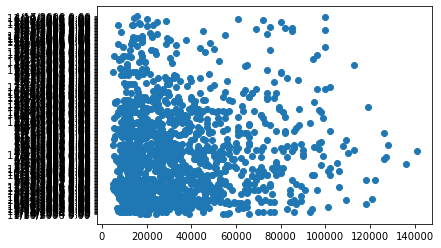

In [7]:
plt.scatter(data.SalePrice[:1500], data.saledate[:1500])

In [8]:
data.saledate[:1500]

0       11/16/2006 0:00
1        3/26/2004 0:00
2        2/26/2004 0:00
3        5/19/2011 0:00
4        7/23/2009 0:00
             ...       
1495     11/6/2008 0:00
1496     8/13/2009 0:00
1497    11/18/2010 0:00
1498    10/25/2007 0:00
1499     4/17/2008 0:00
Name: saledate, Length: 1500, dtype: object

<AxesSubplot:>

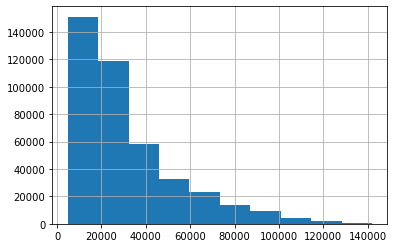

In [9]:
data.SalePrice.hist()

#### Parsing Dates
Used to enrich time & date components to work with time-series data.

In [3]:
data = pd.read_csv('Kaggle/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [11]:
data['saledate'].dtype

dtype('<M8[ns]')

In [12]:
data.saledate[:800]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
795   2007-02-08
796   2009-05-28
797   2006-08-10
798   2010-11-11
799   2009-08-27
Name: saledate, Length: 800, dtype: datetime64[ns]

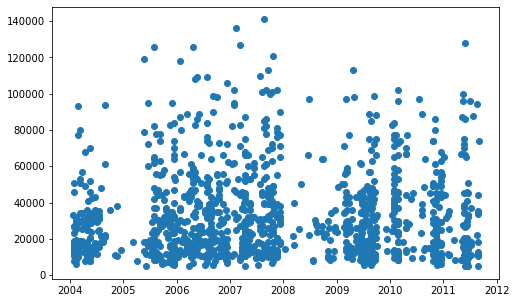

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data.saledate[:1200], data.SalePrice[:1200])

In [14]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


#### Sorting Dataframe

In [15]:
data.sort_values(by='saledate', inplace=True)
data.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

***copy of original dataframe***

In [5]:
temp_data = data.copy()
temp_data.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

#### Adding datetime parameters

In [6]:
temp_data['Year'] = temp_data.saledate.dt.year
temp_data['Month'] = temp_data.saledate.dt.month
temp_data['Day'] = temp_data.saledate.dt.day
temp_data['Day of Year'] = temp_data.saledate.dt.dayofyear
temp_data['Day of Week'] = temp_data.saledate.dt.dayofweek

temp_data.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000,57000,10000,38500,11000,26500,21000,27000,21500,65000,...,11500,13000,20500,13000,10000,10000,10500,12500,10000,13000
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,1,2,2,2,1,2,2,2,2,2
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,68,4640,2838,3486,722,508,11540,4883,302,20700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00,...,2012-02-13 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-02-13 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


In [7]:
temp_data.drop('saledate', axis=1, inplace=True)

In [8]:
temp_data.ProductGroupDesc.value_counts()

Track Excavators       104230
Track Type Tractors     82582
Backhoe Loaders         81401
Wheel Loader            73216
Skid Steer Loaders      45011
Motor Graders           26258
Name: ProductGroupDesc, dtype: int64

In [29]:
len(temp_data)

2343

### 5. Modeling

In [9]:
est = RandomForestRegressor(n_jobs=-1,
                            random_state=49)
est.fit(temp_data.drop('SalePrice', axis=1), temp_data['SalePrice'])

ValueError: could not convert string to float: 'Low'

In [10]:
temp_data.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [22]:
temp_data.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string into categoies
**turning data into numbers by converting them into pandas catgories.**

In [23]:
for col_nam, col_cont in temp_data.items():
    if pd.api.types.is_object_dtype(col_cont):
        print(col_nam)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [11]:
for col_nam, col_cont in temp_data.items():
    if pd.api.types.is_object_dtype(col_cont):
        temp_data[col_nam] = col_cont.astype('category') #.cat.as_ordered()

In [25]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
temp_data.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [27]:
temp_data.Drive_System.cat.codes

205615   -1
274835   -1
141296   -1
212552   -1
62755    -1
         ..
410879   -1
412476   -1
411927   -1
407124    2
409203   -1
Length: 412698, dtype: int8

In [28]:
temp_data.isnull().sum()/len(temp_data)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Saving preprocessed data

In [15]:
temp_data.to_csv("Kaggle/tmp_train.csv", index=False)

In [17]:
df = pd.read_csv('kaggle/tmp_train.csv', low_memory=False)

In [32]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

What's wrong with splitting data after filling it?
* Encode/transform all categorical variables of entire dataset, this ensures categorical variables are encoded the same across training/testing sets
* Split data into train/test.
* Fill the training set and test set numerical values separately.

### Filling missing values
***At first, filling+turning categorical values into numericals***

In [34]:
pd.Categorical(temp_data.state)

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [35]:
for col_nam, col_cont in temp_data.items():
    if not pd.api.types.is_numeric_dtype(col_cont):
        print(col_nam)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [18]:
for col_nam, col_cont in df.items():
    if not pd.api.types.is_numeric_dtype(col_cont):
       # if pd.isnull(col_cont).sum():
        df[col_nam+'data missing'] = pd.isnull(col_cont) # Add binary column to indicate whether sample had missing value
        df[col_nam] = pd.Categorical(col_cont).codes+1  # Turn categories into numbers and add +1

In [143]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000,...,35000,7500,13000,53000,39000,16000,6000,16000,55000,34000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mountingdata missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Blade_Typedata missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Travel_Controlsdata missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Differential_Typedata missing,True,False,True,False,True,True,False,False,True,True,...,False,True,True,False,True,True,True,True,True,False


In [19]:
df['Grouser_Typedata missing'].sum()

310505

In [39]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
                                ..
Backhoe_Mountingdata missing     0
Blade_Typedata missing           0
Travel_Controlsdata missing      0
Differential_Typedata missing    0
Steering_Controlsdata missing    0
Length: 101, dtype: int64

### Splitting data into train/validation/test set

In [41]:
df.Year.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: Year, dtype: int64

In [20]:
train_df = df[df.Year != 2012]
valid_df = df[df.Year == 2012]
len(train_df), len(valid_df)

(401125, 11573)

**Now, fill numerical missing values**

In [43]:
for col_nam, col_cont in valid_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        print(col_nam)
        
for col_nam, col_cont in train_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        print(col_nam)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
Year
Month
Day
Day of Year
Day of Week
UsageBanddata missing
fiModelDescdata missing
fiBaseModeldata missing
fiSecondaryDescdata missing
fiModelSeriesdata missing
fiModelDescriptordata missing
ProductSizedata missing
fiProductClassDescdata missing
statedata missing
ProductGroupdata missing
ProductGroupDescdata missing
Drive_Systemdata

In [44]:
for col_nam, col_cont in train_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        if pd.isna(col_cont).sum():
            print(col_nam)
            
for col_nam, col_cont in valid_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        if pd.isna(col_cont).sum():
            print(col_nam)

auctioneerID
MachineHoursCurrentMeter
MachineHoursCurrentMeter


In [22]:
for col_nam, col_cont in train_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        if pd.isnull(col_cont).sum():
            #train_df[col_nam+' data missing'] = pd.isnull(col_cont)
            train_df[col_nam] = col_cont.fillna(col_cont.median())
            
            
for col_nam, col_cont in valid_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        if pd.isnull(col_cont).sum():
            #valid_df[col_nam+' data missing'] = pd.isnull(col_cont)
            valid_df[col_nam] = col_cont.fillna(col_cont.median())

In [89]:
shoti = np.full((1500, ), 100)
shoti_kuti = np.append(shoti, 10000000)
np.mean(shoti), np.mean(shoti_kuti), np.median(shoti), np.median(shoti_kuti)

(100.0, 6762.15856095936, 100.0, 100.0)

In [47]:
for col_nam, col_cont in valid_df.items():
    if pd.api.types.is_numeric_dtype(col_cont):
        if pd.isna(col_cont).sum():
            print(col_nam)

In [48]:
train_df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
                                ..
Backhoe_Mountingdata missing     0
Blade_Typedata missing           0
Travel_Controlsdata missing      0
Differential_Typedata missing    0
Steering_Controlsdata missing    0
Length: 101, dtype: int64

In [49]:
train_df['auctioneerID'].value_counts()

1.0     185310
2.0      76576
3.0      29076
4.0      20474
6.0      11950
99.0     11406
7.0       7846
8.0       7203
5.0       7002
10.0      5790
9.0       4764
11.0      3823
12.0      3418
13.0      3031
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1792
15.0      1680
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       676
0.0        407
Name: auctioneerID, dtype: int64

### Building an  evaluation function

In [23]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def RMSLE(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def display_score(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = { 'Training coefficient of determination' : r2_score(y_train, train_preds),
               'Validation coefficient of determination': r2_score(y_valid, valid_preds),
               'Training Mean Absolute Error': mean_absolute_error(y_train, train_preds),
               'Validation Mean Absolute Error': mean_absolute_error(y_valid, valid_preds),
               'Training root mean squared log error': RMSLE(y_train, train_preds),
               'Validation root mean squared log error': RMSLE(y_valid, valid_preds),
                
    }
    return scores
    

### Testing the model on a subset (to tune the hyperparameters)

In [24]:
estim = RandomForestRegressor(n_jobs=-1, random_state=49, max_samples=11000)

In [25]:
X_train, y_train = train_df.drop("SalePrice", axis=1), train_df['SalePrice']
X_valid, y_valid = valid_df.drop("SalePrice", axis=1), valid_df['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 100), (401125,), (11573, 100), (11573,))

In [57]:
%%time
estim.fit(X_train, y_train)

Wall time: 10.5 s


RandomForestRegressor(max_samples=11000, n_jobs=-1, random_state=49)

In [58]:
X_train.shape[0] / 11000

36.46590909090909

In [59]:
display_score(estim)

{'Training coefficient of determination': 0.8638061383495608,
 'Validation coefficient of determination': 0.836153118732042,
 'Training Mean Absolute Error': 5487.15252322842,
 'Validation Mean Absolute Error': 7106.714942538668,
 'Training root mean squared log error': 0.25457511826724294,
 'Validation root mean squared log error': 0.2922650973290492}

### Hyperparameter tuning with RandomizedSearchCV

In [146]:
from sklearn.model_selection import RandomizedSearchCV
reg_grid = {'n_estimators':np.arange(50, 100, 10),
            'max_depth':[None, 2, 8, 11],
            'min_samples_split':np.arange(3, 15, 4),
            'min_samples_leaf':np.arange(2, 18, 5),
            'max_features':[4, 'auto', 'sqrt'],
            'max_samples':[11000]
            }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=49),
                             reg_grid,
                             n_iter=100,
                             cv=5,
                             verbose=3)

In [147]:
%%time
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8, score=0.344, total=   5.0s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8, score=0.500, total=   3.1s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8, score=0.523, total=   3.2s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8, score=0.529, total=   3.5s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=8, score=0.519, total=   3.3s
[CV] n_estimators=90, min_samples_split=3, min_samples_leaf=17, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=90, min_samples_split=3, min_samples_leaf=17, max_samples=11000, max_features=auto, max_depth=2, score=0.200, total=   5.4s
[CV] n_estimators=90, min_samples_split=3, min_samples_leaf=17, max_samples=11000, max_featur

[CV]  n_estimators=60, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=auto, max_depth=11, score=0.750, total=   7.0s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=2 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=2, score=0.166, total=   2.4s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=2 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=2, score=0.214, total=   2.4s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=2 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=2, score=0.225, total=   2.4s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=4, m

[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2, score=0.301, total=   4.1s
[CV] n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2, score=0.304, total=   4.1s
[CV] n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2, score=0.323, total=   4.4s
[CV] n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2, score=0.338, total=   4.4s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_fea

[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None, score=0.567, total=   3.3s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11, score=0.383, total=   3.4s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11, score=0.574, total=   3.2s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11, score=0.599, total=   3.3s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=4, max

[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=12, max_samples=11000, max_features=auto, max_depth=11, score=0.783, total=   6.7s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=12, max_samples=11000, max_features=auto, max_depth=11 
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=12, max_samples=11000, max_features=auto, max_depth=11, score=0.761, total=   6.6s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=12, max_samples=11000, max_features=auto, max_depth=11 
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=12, max_samples=11000, max_features=auto, max_depth=11, score=0.760, total=   6.6s
[CV] n_estimators=60, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=60, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=auto, max_depth=2, score=0.200, total=   4.4s
[CV] n_estimators=60, min_samples_split=11, min_samples_leaf=2, max_samples=11

[CV]  n_estimators=70, min_samples_split=7, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=11, score=0.652, total=   3.6s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None, score=0.389, total=   3.6s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None, score=0.583, total=   3.6s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None 
[CV]  n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=None, score=0.596, total=   3.5s
[CV] n_estimators=90, min_samples_split=11, min_samples_leaf=17, max_samples

[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.696, total=   4.0s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.730, total=   3.9s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.729, total=   4.4s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.696, total=   4.0s
[CV] n_estimators=60, min_samples_split=7, min_samples_leaf=17

[CV]  n_estimators=90, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2, score=0.268, total=   2.7s
[CV] n_estimators=90, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=90, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2, score=0.274, total=   2.7s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11, score=0.378, total=   3.0s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=4, max_depth=11, score=0.581, total=   3.0s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_feat

[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2, score=0.194, total=   2.6s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2, score=0.260, total=   2.7s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2, score=0.268, total=   2.7s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=2, score=0.266, total=   2.7s
[CV] n_estimators=80, min_samples_split=11, min_samples_leaf=12, max_samples

[CV]  n_estimators=90, min_samples_split=7, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=None, score=0.812, total=  10.8s
[CV] n_estimators=90, min_samples_split=7, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=None 
[CV]  n_estimators=90, min_samples_split=7, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=None, score=0.783, total=  10.3s
[CV] n_estimators=90, min_samples_split=7, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=None 
[CV]  n_estimators=90, min_samples_split=7, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=None, score=0.781, total=  10.1s
[CV] n_estimators=80, min_samples_split=7, min_samples_leaf=2, max_samples=11000, max_features=sqrt, max_depth=8 
[CV]  n_estimators=80, min_samples_split=7, min_samples_leaf=2, max_samples=11000, max_features=sqrt, max_depth=8, score=0.391, total=   3.6s
[CV] n_estimators=80, min_samples_split=7, min_samples_leaf=2, max_samples=

[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11, score=0.562, total=   3.0s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2, score=0.192, total=   2.5s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2, score=0.257, total=   2.5s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2, score=0.266, total=   2.4s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=17, max_samples=1

[CV]  n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None, score=0.679, total=   3.9s
[CV] n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None 
[CV]  n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None, score=0.700, total=   3.9s
[CV] n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None 
[CV]  n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None, score=0.702, total=   3.9s
[CV] n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None 
[CV]  n_estimators=90, min_samples_split=3, min_samples_leaf=2, max_samples=11000, max_features=4, max_depth=None, score=0.669, total=   4.0s
[CV] n_estimators=90, min_samples_split=3, min_samples_leaf=12, max_samples=11000, max_fea

[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=None, score=0.710, total=   3.4s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=12, max_samples=11000, max_features=sqrt, max_depth=None, score=0.668, total=   3.2s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2, score=0.201, total=   4.9s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=2, score=0.301, total=   4.7s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=7, max_samples=

[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.467, total=   4.0s
[CV] n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.697, total=   4.4s
[CV] n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.730, total=   3.8s
[CV] n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None 
[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=sqrt, max_depth=None, score=0.729, total=   4.4s
[CV] n_estimators=70, min_samples_split=11, min_samples_leaf=7

[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=11, score=0.791, total=   8.0s
[CV] n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=11 
[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=11, score=0.773, total=   8.1s
[CV] n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=11 
[CV]  n_estimators=70, min_samples_split=11, min_samples_leaf=7, max_samples=11000, max_features=auto, max_depth=11, score=0.774, total=   8.0s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2 
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=17, max_samples=11000, max_features=sqrt, max_depth=2, score=0.192, total=   2.4s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=17, max_samples=11

[CV]  n_estimators=80, min_samples_split=11, min_samples_leaf=2, max_samples=11000, max_features=auto, max_depth=8, score=0.730, total=   8.0s
[CV] n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11, score=0.376, total=   2.9s
[CV] n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11, score=0.556, total=   2.9s
[CV] n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11 
[CV]  n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features=4, max_depth=11, score=0.586, total=   2.9s
[CV] n_estimators=50, min_samples_split=7, min_samples_leaf=17, max_samples=11000, max_features

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 37.3min finished


Wall time: 37min 23s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=49),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 2, 8, 11],
                                        'max_features': [4, 'auto', 'sqrt'],
                                        'max_samples': [11000],
                                        'min_samples_leaf': array([ 2,  7, 12, 17]),
                                        'min_samples_split': array([ 3,  7, 11]),
                                        'n_estimators': array([50, 60, 70, 80, 90])},
                   verbose=3)

In [148]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_samples': 11000,
 'max_features': 'auto',
 'max_depth': None}

In [149]:
display_score(rs_model)

{'Training coefficient of determination': 0.8612464147141701,
 'Validation coefficient of determination': 0.8310800508713239,
 'Training Mean Absolute Error': 5513.981794995843,
 'Validation Mean Absolute Error': 7158.200214579914,
 'Training root mean squared log error': 0.25532576944235985,
 'Validation root mean squared log error': 0.291460373587029}

### Training model with `.best_params_`
**Note:** These were found after 100 iterations of RandomizedSearchCV.

In [37]:
complete_model = RandomForestRegressor(n_estimators= 80,
                                        min_samples_split= 3,
                                        min_samples_leaf= 2,
                                        max_samples= 11000,
                                        max_features= 'auto',
                                        max_depth=None,
                                        random_state=49)

complete_model.fit(X_train, y_train)

RandomForestRegressor(max_samples=11000, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=80, random_state=49)

In [151]:
display_score(complete_model)

{'Training coefficient of determination': 0.8612464147141701,
 'Validation coefficient of determination': 0.8310800508713239,
 'Training Mean Absolute Error': 5513.981794995843,
 'Validation Mean Absolute Error': 7158.200214579912,
 'Training root mean squared log error': 0.25532576944235985,
 'Validation root mean squared log error': 0.291460373587029}

In [152]:
display_score(rs_model)

{'Training coefficient of determination': 0.8612464147141701,
 'Validation coefficient of determination': 0.8310800508713239,
 'Training Mean Absolute Error': 5513.981794995843,
 'Validation Mean Absolute Error': 7158.200214579914,
 'Training root mean squared log error': 0.25532576944235985,
 'Validation root mean squared log error': 0.2914603735870289}

### Predict on test data 

In [29]:
test_df = pd.read_csv("Kaggle/Test.csv", low_memory=False, parse_dates=['saledate'])
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [72]:
test_preds = complete_model.predict(test_df)

ValueError: could not convert string to float: 'Low'

### Data Preprocessing 
***getting the test dataset in the same format as our training dataset***

In [27]:
def Preprocessed(data):
    data['Year'] = data.saledate.dt.year
    data['Month'] = data.saledate.dt.month
    data['Day'] = data.saledate.dt.day
    data['Day of Year'] = data.saledate.dt.dayofyear
    data['Day of Week'] = data.saledate.dt.dayofweek
    
    data.drop("saledate", axis=1, inplace=True)
    
    for col_nam, col_cont in data.items():
        if pd.api.types.is_numeric_dtype(col_cont):
            if pd.isnull(col_cont).sum():
                #valid_df[col_nam+' data missing'] = pd.isnull(col_cont)
                data[col_nam] = col_cont.fillna(col_cont.median())
                
        if not pd.api.types.is_numeric_dtype(col_cont):
       # if pd.isnull(col_cont).sum():
            data[col_nam+'data missing'] = pd.isnull(col_cont) # Add binary column to indicate whether sample had missing value
            data[col_nam] = pd.Categorical(col_cont).codes+1
    return data

In [30]:
test_df = Preprocessed(test_df)

test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthdata missing,Stick_Lengthdata missing,Thumbdata missing,Pattern_Changerdata missing,Grouser_Typedata missing,Backhoe_Mountingdata missing,Blade_Typedata missing,Travel_Controlsdata missing,Differential_Typedata missing,Steering_Controlsdata missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [153]:
test_preds = complete_model.predict(test_df)

In [154]:
set(X_train.columns) - set(test_df.columns)

set()

In [84]:
## Manually adjust df_test to have auctioneerID_is_missing column
# test_df["auctioneerID_is_missing"] = False

Finally when test dataframe has the same features as training dataframe, we can make predictions!

In [85]:
test_preds

array([24578.79083307, 27268.55234167, 63320.83624438, ...,
       11987.60008598, 14779.64408551, 20680.56709319])

In [155]:
df_preds = pd.DataFrame()
df_preds['Sales ID'] = test_df.SalesID
df_preds['Sales Price'] = test_preds

In [156]:
df_preds

,Sales ID,Sales Price
0,1227829,19286.979167
1,1227844,24478.229167
2,1227847,52123.958333
3,1227848,81538.385417
4,1227863,38688.541667
...,...,...
12452,6643171,49319.791667
12453,6643173,11287.291667
12454,6643184,11617.604167
12455,6643186,15334.062500


In [157]:
df_preds.to_csv('Kaggle/submission format', index=False)

In [99]:
pd.read_csv('Kaggle/submission format')

,Sales ID,Sales Price
0,1227829,24578.790833
1,1227844,27268.552342
2,1227847,63320.836244
3,1227848,76731.691191
4,1227863,32711.004080
...,...,...
12452,6643171,46541.732244
12453,6643173,13437.897303
12454,6643184,11987.600086
12455,6643186,14779.644086


## Feature Importance
Feature importance seeks to figure out which different attributes of the dataset were most importance when it comes to predicting the target variable.

In [33]:
complete_model.feature_importances_

NameError: name 'complete_model' is not defined

In [31]:
# plotting func for Feature Importance
def features_plot(columns, importances, n=20):
    df = (pd.DataFrame({'feats': columns,
                        'feat_importanc': importances}).sort_values('feat_importanc', ascending=False)
                                                           .reset_index(drop=True)
         )
    
    figure, axes = plt.subplots(figsize=(10,8))
    axes.barh(df['feats'][:n], df['feat_importanc'][:n])
    axes.set_ylabel('Featues')
    axes.set_xlabel('Featue Importance')
    axes.invert_yaxis()
    

In [35]:
features_plot(X_train.columns, complete_model.feature_importances_, 30)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [165]:
temp_data.Enclosure.value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

**Question to finish**: Why might knowing the feature importances of a trained machine learning model be helpful?

**Final challenge/extension**: What other machine learning models could you try on our dataset?

Try to look at something like CatBoost.ai or XGBooost.ai.